In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
tf1= tf.constant([[1, 2, 3], [4, 5, 6]])
tf2= tf.constant([[7, 8, 9], [10, 11, 12]])

tf1, tf2

(<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[ 7,  8,  9],
        [10, 11, 12]], dtype=int32)>)

In [5]:
tf1 + tf2

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 8, 10, 12],
       [14, 16, 18]], dtype=int32)>

In [6]:
# Example of a simple TensorFlow operation
result = tf.add(tf1, tf2)
print("Result of addition:\n", result.numpy())

Result of addition:
 [[ 8 10 12]
 [14 16 18]]


Here it is good to convert the data into numpy because there are numerous of libraries which can work with 

In [20]:
random_uniform = tf.random.uniform([2, 2])   # Values between 0-1
print("Uniform tf.random:",random_uniform)

random_normal = tf.random.normal([3, 3])     # Normal distribution
print("Normal tf.random:",random_normal)

Uniform tf.random: tf.Tensor(
[[0.56021154 0.4630028 ]
 [0.25911403 0.7337065 ]], shape=(2, 2), dtype=float32)
Normal tf.random: tf.Tensor(
[[ 2.0976024  -0.5806234  -1.1084939 ]
 [ 0.307499    1.0426614  -0.5628196 ]
 [-0.45649987 -2.12347    -0.71792823]], shape=(3, 3), dtype=float32)


In [8]:
# 6A. Numpy to Tensor
np_array = np.array([[1, 2], [3, 4]])
print("Numpy array:", np_array)

tensor = tf.constant(np_array)       # or tf.convert_to_tensor(np_array)
print("Tensor:", tensor)

# 6B. Tensor to Numpy
back_to_np = tensor.numpy()
print("Numpy array from tensor:", back_to_np)

Numpy array: [[1 2]
 [3 4]]
Tensor: tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int64)
Numpy array from tensor: [[1 2]
 [3 4]]


In [9]:
# Simulate RGB image (3D tensor)
fake_image = tf.random.uniform([224, 224, 3], maxval=255, dtype=tf.int32)

# 7A. Check properties
print("Image shape:", fake_image.shape)  # Should be (224, 224, 3)
# print(fake_image)

# 7B. Normalize to [0, 1]
normalized = tf.cast(fake_image, tf.float32) / 255.0
print("Normalized image shape:", normalized.shape)

# print(normalized)

Image shape: (224, 224, 3)
Normalized image shape: (224, 224, 3)


### NOTE: If the image is in INT32 format then normalizing fails, so before normalizing convert it into FLOAT32.

In [10]:
# Create an identity matrix

identity_matrix = tf.eye(3)
print("Identity matrix:\n", identity_matrix.numpy())

Identity matrix:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [22]:
black_img = tf.zeros([300, 200, 3], dtype=tf.uint8) # 3 for RGB Image


In [12]:
D= tf.constant([[1, 2, 3], [4, 5, 6]])
E= tf.constant([10, 11, 12])

# Example of broadcasting
F = D + E  # E is broadcasted to match D's shape
print("Result of broadcasting:\n", F.numpy())

G = D * E  # E is broadcasted to match D's shape
print("Result of multiplication broadcasting:\n", G.numpy())

# Example of broadcasting with a scalar
scalar = 5
G = D + scalar  # Scalar is broadcasted to match D's shape
print("Result of broadcasting with scalar:\n", G.numpy())


Result of broadcasting:
 [[11 13 15]
 [14 16 18]]
Result of multiplication broadcasting:
 [[10 22 36]
 [40 55 72]]
Result of broadcasting with scalar:
 [[ 6  7  8]
 [ 9 10 11]]


In [13]:
print("Shape of D:", D.shape)
H= tf.reshape(D, [3, 2])
print("Reshaped D:\n", H.numpy())


Shape of D: (2, 3)
Reshaped D:
 [[1 2]
 [3 4]
 [5 6]]


In [19]:
# Example of concatenation
A = tf.constant([[1, 2], [3, 4]])
B = tf.constant([[5, 6], [7, 8]])
C = tf.concat([A, B], axis=0)
print("Concatenated result:\n", C.numpy())

Concatenated result:
 [[1 2]
 [3 4]
 [5 6]
 [7 8]]


In [1]:
import tensorflow as tf

a = tf.constant([[[1], [2], [3]]])  # Shape: (1, 3, 1)
b = tf.squeeze(a)                  # Shape: (3,)
c = tf.squeeze(a, axis=[0])        # Shape: (3, 1)

print(b.numpy())  # [1, 2, 3]
print(c.numpy())  # [[1], [2], [3]]


[1 2 3]
[[1]
 [2]
 [3]]


In [2]:
a = tf.constant([1, 2, 3])  # Shape: (3,)
b = tf.expand_dims(a, axis=0)  # Shape: (1, 3)
c = tf.expand_dims(a, axis=1)  # Shape: (3, 1)

print(b.numpy())  # [[1, 2, 3]]
print(c.numpy())  # [[1], [2], [3]]


[[1 2 3]]
[[1]
 [2]
 [3]]


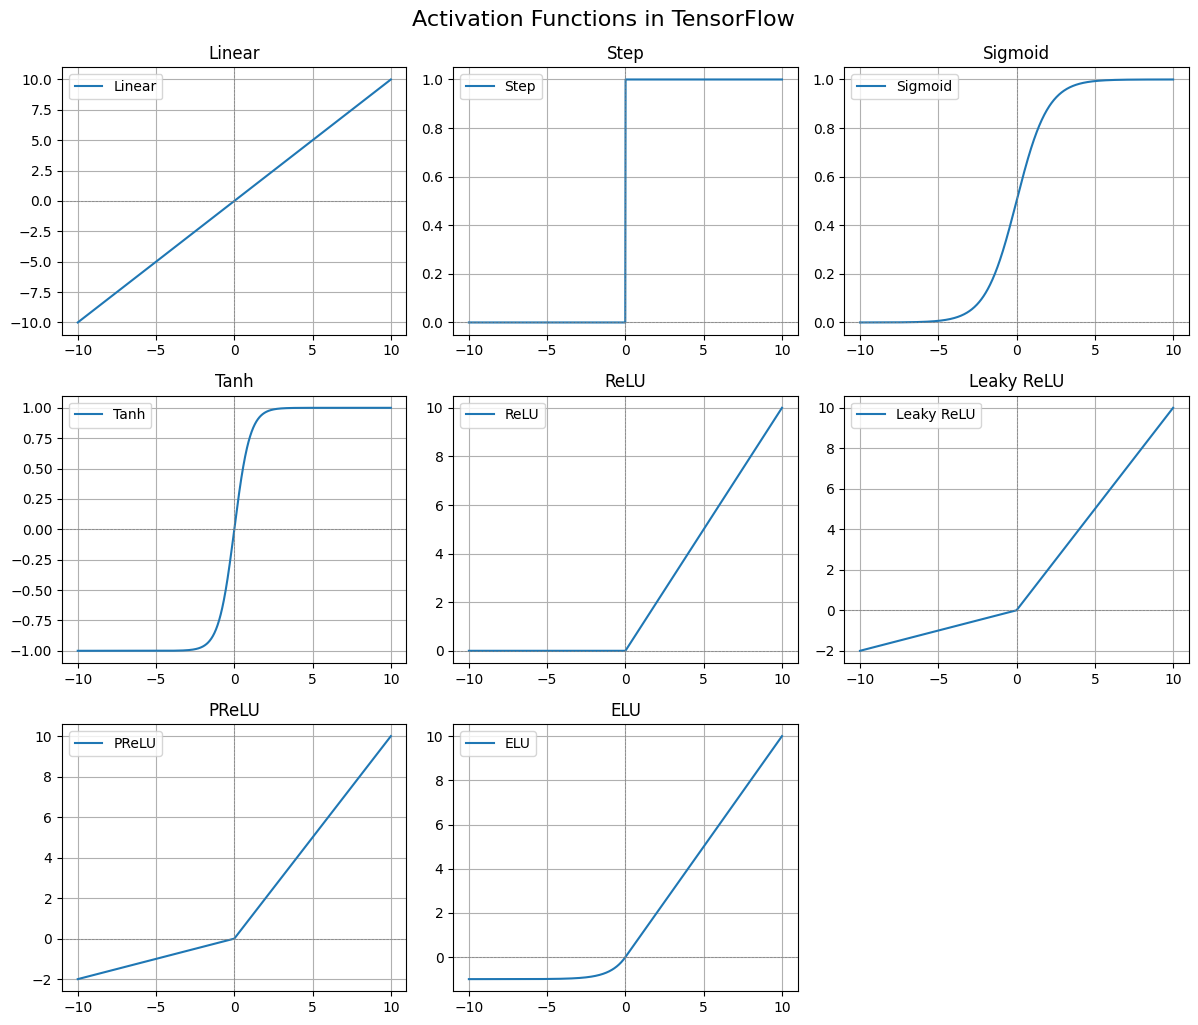

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Input range for plotting
x = tf.linspace(-10.0, 10.0, 1000)

# Activation functions
activations = {
    "Linear": lambda x: x,
    "Step": lambda x: tf.cast(x > 0, tf.float32),
    "Sigmoid": tf.nn.sigmoid,
    "Tanh": tf.nn.tanh,
    "ReLU": tf.nn.relu,
    "Leaky ReLU": tf.nn.leaky_relu,
    "PReLU": lambda x: tf.maximum(0.2 * x, x),  # PReLU approximation
    "ELU": tf.nn.elu
}

# Plot each activation function
plt.figure(figsize=(12, 10))
for i, (name, func) in enumerate(activations.items(), 1):
    y = func(x)
    plt.subplot(3, 3, i)
    plt.plot(x, y.numpy(), label=name)
    plt.title(name)
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.legend()

plt.tight_layout()
plt.suptitle("Activation Functions in TensorFlow", fontsize=16, y=1.02)
plt.show()


In [1]:
import tensorflow as tf

# Sigmoid
def sigmoid(x):
    return tf.nn.sigmoid(x)

# Example
x = tf.constant([-2.0, -1.0, 0.0, 1.0, 2.0])
print("Sigmoid:", sigmoid(x).numpy())

Sigmoid: [0.11920294 0.2689414  0.5        0.73105854 0.8807971 ]


In [2]:
# Tanh
def tanh(x):
    return tf.nn.tanh(x)

# Example
x = tf.constant([-2.0, -1.0, 0.0, 1.0, 2.0])
print("Tanh:", tanh(x).numpy())


Tanh: [-0.9640276 -0.7615942  0.         0.7615942  0.9640276]


In [3]:
# ReLU
def relu(x):
    return tf.nn.relu(x)

# Example
x = tf.constant([-2.0, -1.0, 0.0, 1.0, 2.0])
print("ReLU:", relu(x).numpy())

ReLU: [0. 0. 0. 1. 2.]


In [4]:
# Softmax
def softmax(x):
    return tf.nn.softmax(x)

# Example
x = tf.constant([2.0, 1.0, 0.1])
print("Softmax:", softmax(x).numpy())

Softmax: [0.6590011  0.24243298 0.09856588]


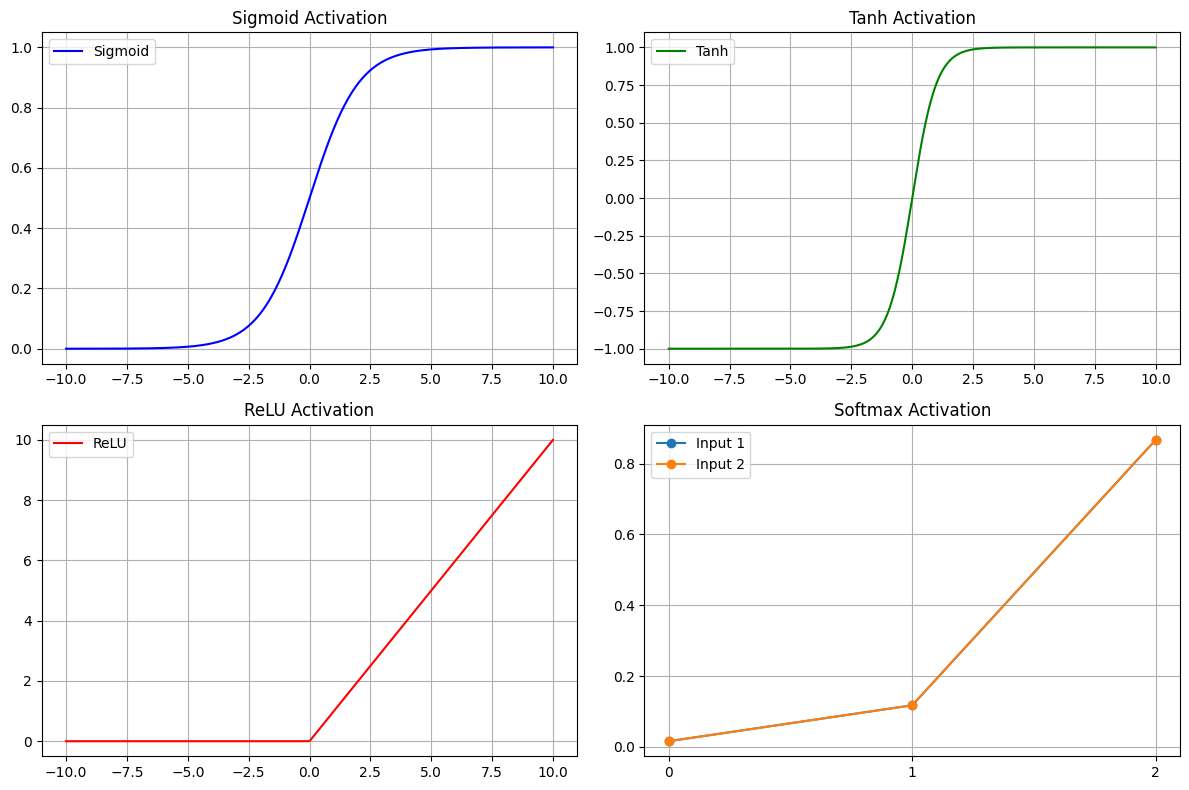

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Activation functions
def sigmoid(x):
    return tf.nn.sigmoid(x)

def tanh(x):
    return tf.nn.tanh(x)

def relu(x):
    return tf.nn.relu(x)

def softmax(x):
    return tf.nn.softmax(x)

# Input range
x = tf.linspace(-10.0, 10.0, 400)   # values from -10 to 10
x_softmax = tf.constant([[-2.0, 0.0, 2.0], [-1.0, 1.0, 3.0]])  # multiple vectors

# Compute activations
y_sigmoid = sigmoid(x)
y_tanh = tanh(x)
y_relu = relu(x)

# Plotting
plt.figure(figsize=(12, 8))

# Sigmoid
plt.subplot(2, 2, 1)
plt.plot(x, y_sigmoid, label="Sigmoid", color="blue")
plt.title("Sigmoid Activation")
plt.grid(True)
plt.legend()

# Tanh
plt.subplot(2, 2, 2)
plt.plot(x, y_tanh, label="Tanh", color="green")
plt.title("Tanh Activation")
plt.grid(True)
plt.legend()

# ReLU
plt.subplot(2, 2, 3)
plt.plot(x, y_relu, label="ReLU", color="red")
plt.title("ReLU Activation")
plt.grid(True)
plt.legend()

# Softmax (special case: applied on vectors)
plt.subplot(2, 2, 4)
y_softmax = softmax(x_softmax).numpy()
for i, vec in enumerate(y_softmax):
    plt.plot(range(len(vec)), vec, marker="o", label=f"Input {i+1}")
plt.title("Softmax Activation")
plt.xticks([0, 1, 2])
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()